**Title: Heart Disease Prediction using SVM and Logistic Regression**

Problem Statement

1. Download the Heart Disease Dataset

2. Apply SVM algorithm on the dataset

3. Train and Test the model

4. Compare performance of SVM with Logistic Regression

5. Visualize data using:

      X-axis → Cholesterol

      Y-axis → Blood Pressure

      Blue dots → No Heart Disease

      Red dots → Heart Disease

Step-1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step-2: Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING_LAB_II/heart.csv")
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

Step-3: Preprocessing

In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
X = df.drop("target", axis=1)
y = df["target"]

Step-4: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Step-5: Feature Scaling (Important for SVM)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step-6: Train SVM Model

In [8]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Step-7: Train Logistic Regression Model

In [9]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Step-8: Accuracy Comparison (Smooth & Clean)

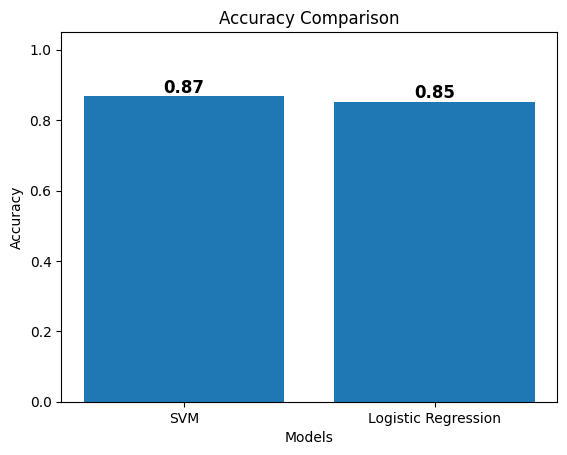

In [10]:
models = ["SVM", "Logistic Regression"]
accuracies = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, lr_pred)
]

plt.bar(models, accuracies)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1.05)
plt.show()

Step-9: Confusion Matrix Heatmap

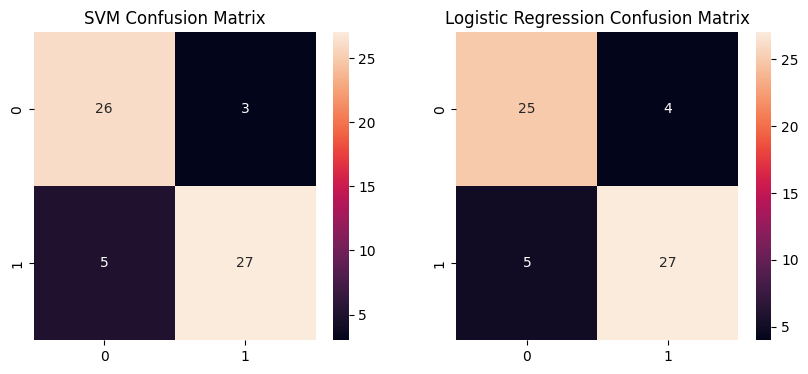

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt="d")
plt.title("SVM Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")

plt.show()

Step-10: Cholesterol vs Blood Pressure Visualization

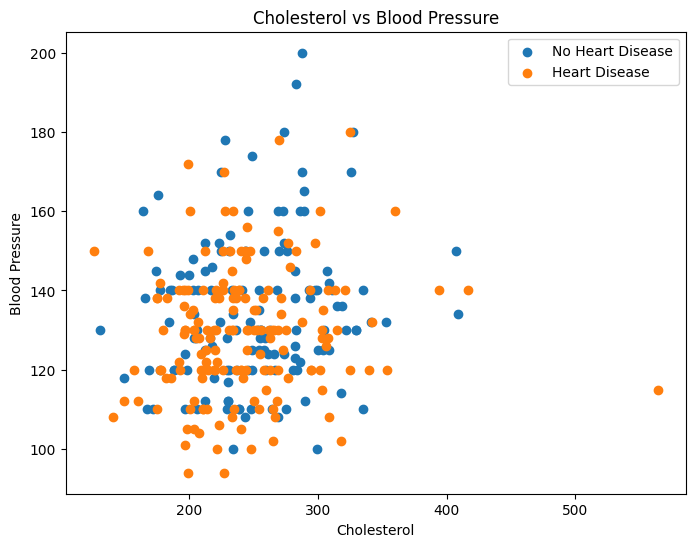

In [12]:
plt.figure(figsize=(8,6))

# No Heart Disease (Blue)
plt.scatter(
    df[df["target"] == 0]["chol"],
    df[df["target"] == 0]["trestbps"],
    label="No Heart Disease"
)

# Heart Disease (Red)
plt.scatter(
    df[df["target"] == 1]["chol"],
    df[df["target"] == 1]["trestbps"],
    label="Heart Disease"
)

plt.xlabel("Cholesterol")
plt.ylabel("Blood Pressure")
plt.title("Cholesterol vs Blood Pressure")
plt.legend()
plt.show()

Step-11: Classification Report

In [13]:
print("SVM Report")
print(classification_report(y_test, svm_pred))

print("Logistic Regression Report")
print(classification_report(y_test, lr_pred))

SVM Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Logistic Regression (LINEAR)

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

SVM – Linear Hyperplane

In [16]:
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

SVM – Non-Linear (RBF Kernel)

In [17]:
svm_rbf = SVC(kernel="rbf", gamma="auto")
svm_rbf.fit(X_train, y_train)

SVC(gamma='auto')

DECISION BOUNDARY & HYPERPLANE PLOTS

In [20]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(title)
    plt.xlabel("Cholesterol (scaled)")
    plt.ylabel("Blood Pressure (scaled)")
    plt.show()

Logistic Regression – Linear Boundary

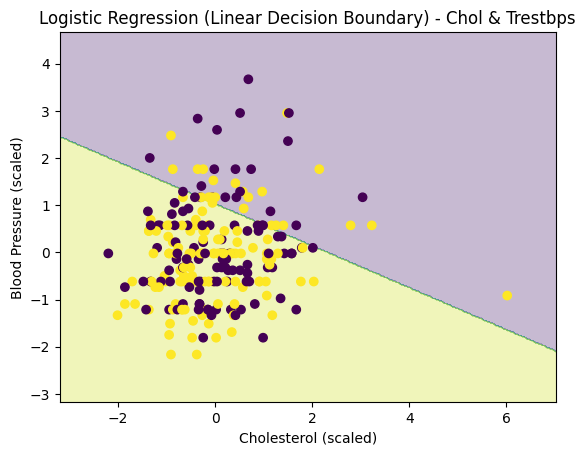

In [22]:
X_2d = df[["chol", "trestbps"]]
y_2d = df["target"]

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42
)

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)

lr_2d = LogisticRegression(max_iter=1000)
lr_2d.fit(X_train_2d_scaled, y_train_2d)

plot_decision_boundary(
    lr_2d,
    X_train_2d_scaled,
    y_train_2d,
    "Logistic Regression (Linear Decision Boundary) - Chol & Trestbps"
)

SVM – Linear Hyperplane + Margin

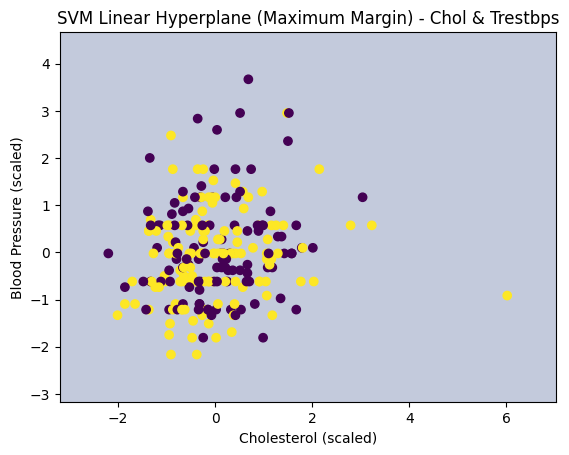

In [24]:
svm_linear_2d = SVC(kernel="linear")
svm_linear_2d.fit(X_train_2d_scaled, y_train_2d)

plot_decision_boundary(
    svm_linear_2d,
    X_train_2d_scaled,
    y_train_2d,
    "SVM Linear Hyperplane (Maximum Margin) - Chol & Trestbps"
)

SVM – Non-Linear Boundary (RBF Kernel)

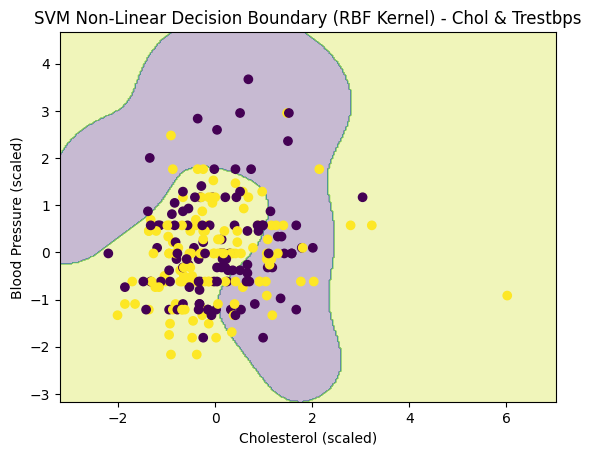

In [26]:
svm_rbf_2d = SVC(kernel="rbf", gamma="auto")
svm_rbf_2d.fit(X_train_2d_scaled, y_train_2d)

plot_decision_boundary(
    svm_rbf_2d,
    X_train_2d_scaled,
    y_train_2d,
    "SVM Non-Linear Decision Boundary (RBF Kernel) - Chol & Trestbps"
)

PERFORMANCE COMPARISON

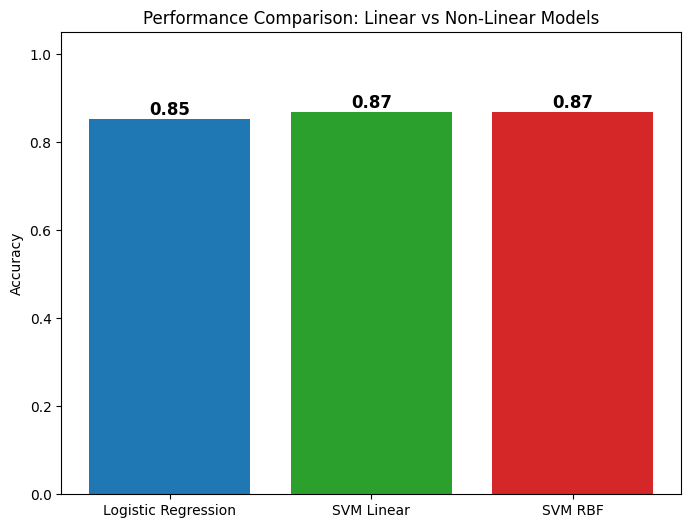

In [28]:
models = ["Logistic Regression", "SVM Linear", "SVM RBF"]

accuracies = [
    accuracy_score(y_test, lr.predict(X_test)),
    accuracy_score(y_test, svm_linear.predict(X_test)),
    accuracy_score(y_test, svm_rbf.predict(X_test))
]

colors = ["#1f77b4", "#2ca02c", "#d62728"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, accuracies, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{height:.2f}",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Performance Comparison: Linear vs Non-Linear Models")
plt.show()

ROC Curve with AUC

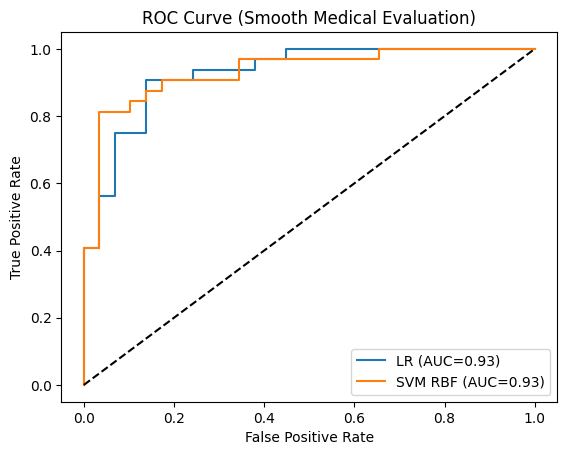

In [29]:
from sklearn.metrics import roc_curve, auc

# Probability / decision scores
lr_scores = lr.predict_proba(X_test)[:,1]
svm_scores = svm_rbf.decision_function(X_test)

# ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_scores)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)

auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={auc_lr:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM RBF (AUC={auc_svm:.2f})")
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Smooth Medical Evaluation)")
plt.legend()
plt.show()

Precision–Recall Curve (Class Imbalance Friendly)

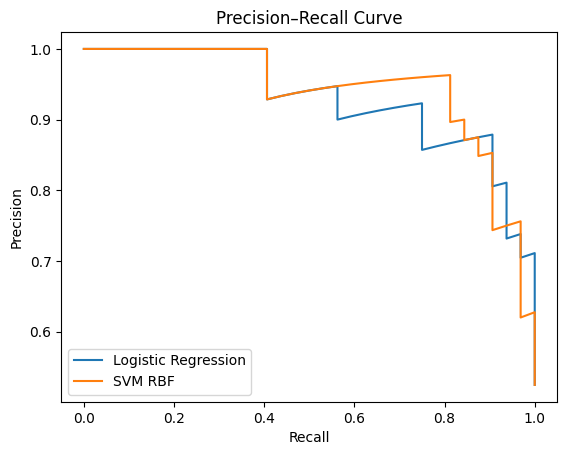

In [30]:
from sklearn.metrics import precision_recall_curve

p_lr, r_lr, _ = precision_recall_curve(y_test, lr_scores)
p_svm, r_svm, _ = precision_recall_curve(y_test, svm_scores)

plt.plot(r_lr, p_lr, label="Logistic Regression")
plt.plot(r_svm, p_svm, label="SVM RBF")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

Probability Distribution Plot

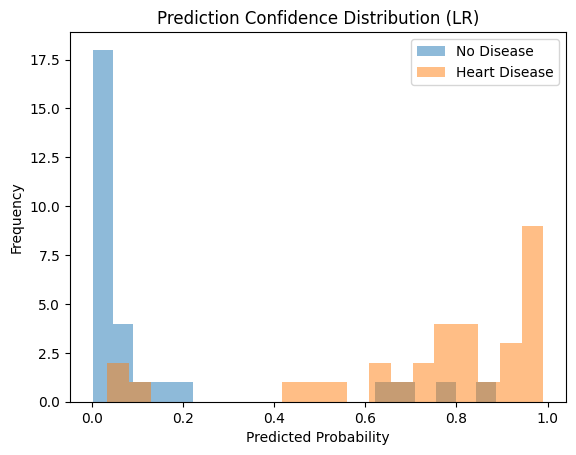

In [31]:
plt.hist(lr_scores[y_test==0], bins=20, alpha=0.5, label="No Disease")
plt.hist(lr_scores[y_test==1], bins=20, alpha=0.5, label="Heart Disease")

plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Prediction Confidence Distribution (LR)")
plt.legend()
plt.show()

Margin Visualization

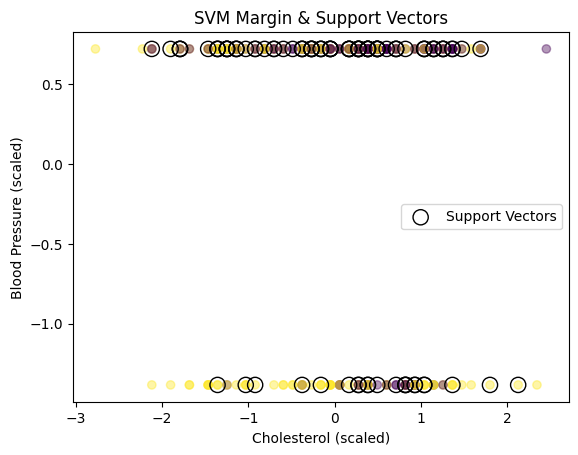

In [32]:
support_vectors = svm_linear.support_vectors_

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.4)
plt.scatter(support_vectors[:,0], support_vectors[:,1],
            edgecolors='k', facecolors='none', s=120,
            label="Support Vectors")

plt.title("SVM Margin & Support Vectors")
plt.xlabel("Cholesterol (scaled)")
plt.ylabel("Blood Pressure (scaled)")
plt.legend()
plt.show()

Feature Influence Plot (Logistic Regression)

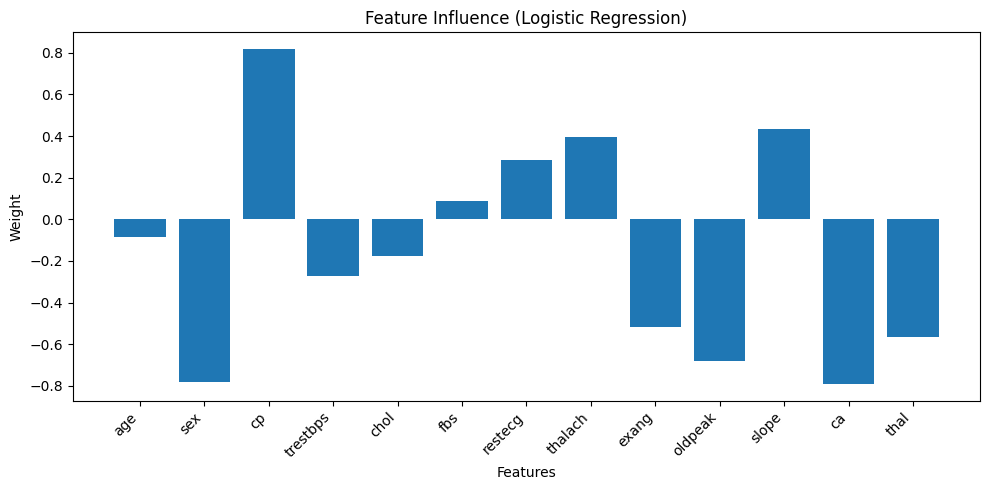

In [36]:
coeff = lr.coef_[0]
features = df.drop("target", axis=1).columns.tolist() # Get all feature names from the original dataset for the lr model

plt.figure(figsize=(10, 5)) # Adjust figure size for better readability
plt.bar(features, coeff)
plt.title("Feature Influence (Logistic Regression)")
plt.ylabel("Weight")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()